![SolidQ](https://antoniosql.github.io/images/SolidQ_Verne.png) 

# Carga de datos y revisión

In [17]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


In [18]:
conn = sqlite3.connect('Tiendas24H.sqlite')
consulta="select c.CodCliente, FechaNacimiento, EstadoCivil, Sexo, IngresosAnuales, N.NivelAcademico, O.Ocupacion, case     when v.CodCliente is null then 0   else 1  end as 'EsCliente' from clientes c inner join NivelAcademico N    on c.NivelAcademico = N.Codigo     inner join Ocupacion O on c.Ocupacion = o.Codigo     left outer join VentasCAB v          on v.codcliente = C.codcliente where c.Codcliente <>'CONTADO'"

df = pd.read_sql_query(consulta,conn)

df.head()

,CodCliente,FechaNacimiento,EstadoCivil,Sexo,IngresosAnuales,NivelAcademico,Ocupacion,EsCliente
0,000020,1976-04-08,M,M,90000.0,Licenciatura,Profesional especializado,1
1,000026,1975-05-14,S,M,60000.0,Licenciatura,Profesional especializado,1
2,000026,1975-05-14,S,M,60000.0,Licenciatura,Profesional especializado,1
3,000026,1975-05-14,S,M,60000.0,Licenciatura,Profesional especializado,1
4,000026,1975-05-14,S,M,60000.0,Licenciatura,Profesional especializado,1


In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
caracteristicas = ["EstadoCivil", "Sexo", "IngresosAnuales","NivelAcademico", "Ocupacion"]
etiqueta="EsCliente"

In [21]:
from sklearn.preprocessing import  LabelEncoder

le=LabelEncoder()
df['EstadoCivil'] = le.fit_transform(df['EstadoCivil'])
df['Sexo'] = le.fit_transform(df['Sexo'])

In [22]:
dum_df = pd.get_dummies(df[caracteristicas], columns=["NivelAcademico","Ocupacion"] )

In [23]:
from sklearn.model_selection import train_test_split
X, y = dum_df, df[etiqueta]

In [24]:
X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
  test_size=0.3,
  random_state=0,
  stratify=y)

# Escalado

In [25]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Árboles de Decisión


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.99


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0   17]
 [   3 3100]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.99      1.00      1.00      3103

    accuracy                           0.99      3120
   macro avg       0.50      0.50      0.50      3120
weighted avg       0.99      0.99      0.99      3120



In [42]:
columnas = ["EstadoCivil", "Sexo", "IngresosAnuales","NivelAcademico", "Ocupacion"]
entrada = [[1,1,25000,1,1] ,[1,1,30000,2,2],[1,1,35000,3,3],[1,1,40000,4,4],[1,1,45000,5,5]]

datos=pd.DataFrame(entrada, columns = columnas)

datos_Entrada = pd.get_dummies(datos, columns=["NivelAcademico","Ocupacion"] )


prediccion = clf.predict_proba(datos_Entrada)

In [43]:
prediccion

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

# k-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0   29]
 [   0 5170]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.99      1.00      1.00      5170

    accuracy                           0.99      5199
   macro avg       0.50      0.50      0.50      5199
weighted avg       0.99      0.99      0.99      5199



([<matplotlib.axis.XTick at 0x2572d1a9310>,
 <a list of 5 Text major ticklabel objects>)

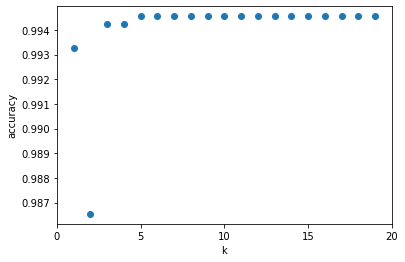

In [15]:
# cómo afecta el número de ks
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# Regresión Logística

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0   17]
 [   0 3103]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.99      1.00      1.00      3103

    accuracy                           0.99      3120
   macro avg       0.50      0.50      0.50      3120
weighted avg       0.99      0.99      0.99      3120



# SVM

In [17]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0   17]
 [   0 3103]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.99      1.00      1.00      3103

    accuracy                           0.99      3120
   macro avg       0.50      0.50      0.50      3120
weighted avg       0.99      0.99      0.99      3120



# Balanceando con SMOTE

In [32]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [33]:
print('Distribución Original %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Distribución balanceada %s' % Counter(y_res))

Distribución Original Counter({1: 10340, 0: 58})
Distribución balanceada Counter({1: 10340, 0: 10340})


In [34]:
from sklearn.model_selection import train_test_split
X_trainres, X_testres, y_trainres, y_testres = train_test_split(X_res, y_res, random_state=0)

In [35]:
clf = DecisionTreeClassifier().fit(X_trainres, y_trainres)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_trainres, y_trainres)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_testres, y_testres)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.97


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_testres)
print(confusion_matrix(y_testres, pred))
print(classification_report(y_testres, pred))

[[2569   35]
 [ 127 2439]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2604
           1       0.99      0.95      0.97      2566

    accuracy                           0.97      5170
   macro avg       0.97      0.97      0.97      5170
weighted avg       0.97      0.97      0.97      5170



# Balanced Bagging

In [37]:
from imblearn.ensemble import BalancedBaggingClassifier

In [40]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


bbc.fit(X_trainres, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0)

In [41]:
pred_y = bbc.predict(X_test)
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[2570   34]
 [ 127 2439]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2604
           1       0.99      0.95      0.97      2566

    accuracy                           0.97      5170
   macro avg       0.97      0.97      0.97      5170
weighted avg       0.97      0.97      0.97      5170

